# Keras Repaso
Como ya vimos en clases anteriores Keras es una librería para programar redes neuronales de una manera más sencilla que con TensorFlow. Keras se encuentra en una capa de abstracción por encima de TensorFlow.

[Documentación](https://keras.io/guides/)

In [ ]:
# !pip install tensorflow
# !pip install keras

Empezamos importando librerías

In [1]:
import tensorflow as tf
from tensorflow import keras

import pandas as pd
import numpy as np

#### Clasificación

Utilizaremos el dataset de diabetes

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/npradaschnor/Pima-Indians-Diabetes-Dataset/master/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
from sklearn.model_selection import train_test_split
X = df.drop(columns='Outcome').values
y = df['Outcome'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=40)
print(X_train.shape); print(X_test.shape)

(537, 8)
(231, 8)


Escalamos los datos

In [4]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scal = scaler.transform(X_train)
X_test_scal = scaler.transform(X_test)

Transformamos nuestra target en base al número de categorías

In [5]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

y_test.shape

(231, 2)

In [6]:
y_test

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.

Montamos la arquitectura de la red neuronal. Se va a componer de:
* **Sequential**: Para iniciar la red neuronal. No cuenta como capa.
* **Dense**: Es una hidden layer. Se compondrá de `n` neuronas y de una función de activación que se aplicará a todas las neuronas de la capa.

Recuerda que es un problema de clasificación y que por tanto la última capa se compondrá de tantas neuronas como clases tengas.

En cuanto a las funciones de activación es recomendable usar relu en las hidden layer, que tarda menos en entrenar, mientras que la ultima (output) suele ser una softmax.

In [8]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

model = Sequential()

model.add(Dense(500, activation='relu', input_dim=8)) #input_dim determina las columnas que usaremos para entrenar
model.add(Dropout(0.2))
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(50, activation='relu'))
model.add(Dense(2, activation='softmax'))


In [9]:
model.compile(optimizer='adam',
             loss = 'categorical_crossentropy',
             metrics=['AUC'])

In [10]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 500)               4500      
                                                                 
 dropout (Dropout)           (None, 500)               0         
                                                                 
 dense_2 (Dense)             (None, 100)               50100     
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                                 
 dense_3 (Dense)             (None, 50)                5050      
                                                                 
 dense_4 (Dense)             (None, 2)                 102       
                                                                 
Total params: 59,752
Trainable params: 59,752
Non-trai

Entrenamos el modelo. Usamos los datos de entrenamiento. El batch_size es la cantidad de muestras que utiliza el SGD, y las epochs son las iteraciones que realiza en el entrenamiento.

In [11]:
history = model.fit(X_train_scal,
                   y_train,
                   batch_size=32,
                   epochs = 100,
                   validation_split=0.1) #validation_split, subdivide el cojunto de datos de train para crear un conjunto de valiación

Epoch 1/100
16/16 [==============================] - 1s 20ms/step - loss: 0.6590 - auc: 0.6665 - val_loss: 0.7144 - val_auc: 0.5093
Epoch 2/100
16/16 [==============================] - 0s 4ms/step - loss: 0.6479 - auc: 0.6551 - val_loss: 0.6621 - val_auc: 0.6571
Epoch 3/100
16/16 [==============================] - 0s 4ms/step - loss: 0.6162 - auc: 0.7265 - val_loss: 0.6347 - val_auc: 0.6948
Epoch 4/100
16/16 [==============================] - 0s 5ms/step - loss: 0.5824 - auc: 0.7748 - val_loss: 0.6522 - val_auc: 0.6931
Epoch 5/100
16/16 [==============================] - 0s 4ms/step - loss: 0.5672 - auc: 0.7828 - val_loss: 0.5751 - val_auc: 0.7699
Epoch 6/100
16/16 [==============================] - 0s 5ms/step - loss: 0.5551 - auc: 0.7888 - val_loss: 0.5463 - val_auc: 0.7980
Epoch 7/100
16/16 [==============================] - 0s 5ms/step - loss: 0.5442 - auc: 0.8055 - val_loss: 0.5713 - val_auc: 0.7730
Epoch 8/100
16/16 [==============================] - 0s 5ms/step - loss: 0.5229 - 

Veamos el histórico del entrenamiento, para poder representarlo posteriormente.

In [12]:
print(history.params)
print(history.epoch)
print(history.history)

{'verbose': 1, 'epochs': 100, 'steps': 16}
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
{'loss': [0.659028947353363, 0.6479185223579407, 0.616184413433075, 0.5824301242828369, 0.5671752691268921, 0.5551106333732605, 0.5441688299179077, 0.5229015946388245, 0.5207714438438416, 0.4992910325527191, 0.492074191570282, 0.4992927312850952, 0.5185018181800842, 0.485768586397171, 0.48460960388183594, 0.4860706031322479, 0.4790387451648712, 0.4720354974269867, 0.4622107744216919, 0.45812392234802246, 0.4734194874763489, 0.48483890295028687, 0.47420015931129456, 0.46355658769607544, 0.4487763047218323, 0.4407416582107544, 0.45451685786247253, 0.438168793916

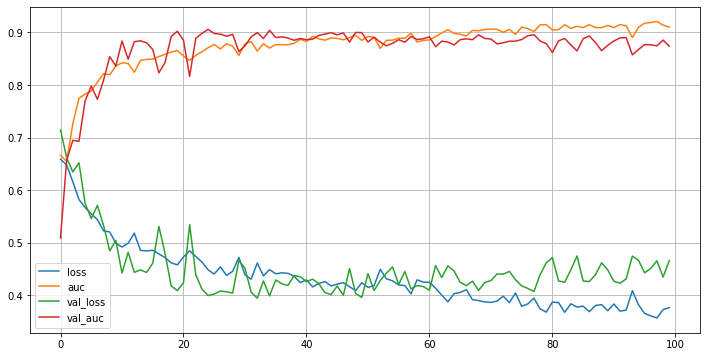

In [13]:
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(12,6))
plt.grid()
plt.show()

Si el modelo no ha ido bien, prueba a cambiar el learning rate, cambia de optimizador y después prueba a cambiar capas, neuronas y funciones de activación.

Ya tenemos el modelo entrenado. Medimos el desempeño

In [14]:
np.argmax(model.predict(X_train_scal),axis=1)

17/17 [==============================] - 0s 1ms/step


array([1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [15]:
y_train

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [1., 0.],
       [0., 1.],
       [0., 1.]], dtype=float32)

17/17 [==============================] - 0s 976us/step
              precision    recall  f1-score   support

           0       0.87      0.91      0.89       358
           1       0.80      0.72      0.76       179

    accuracy                           0.85       537
   macro avg       0.83      0.82      0.82       537
weighted avg       0.85      0.85      0.85       537

ROC AUC del modelo: 0.8156424581005586


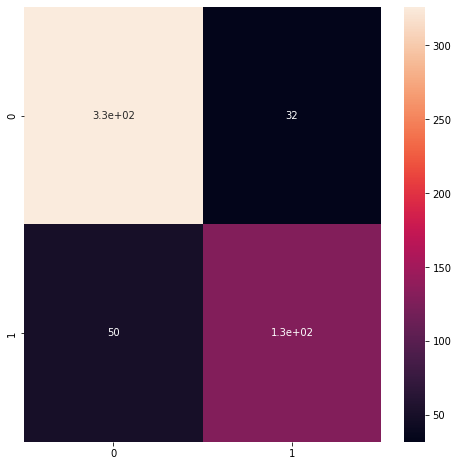

In [21]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import seaborn as sns

pred_train = np.argmax(model.predict(X_train_scal),axis=1)
print(classification_report(np.argmax(y_train,axis=1),pred_train))
print(f'ROC AUC del modelo: {roc_auc_score(np.argmax(y_train,axis=1),pred_train)}')
plt.figure(figsize=(8,8))
sns.heatmap(confusion_matrix(np.argmax(y_train,axis=1),pred_train), annot=True);

In [22]:
confusion_matrix(np.argmax(y_train,axis=1),pred_train)

array([[326,  32],
       [ 50, 129]], dtype=int64)

8/8 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.74      0.88      0.81       142
           1       0.73      0.52      0.61        89

    accuracy                           0.74       231
   macro avg       0.74      0.70      0.71       231
weighted avg       0.74      0.74      0.73       231

ROC AUC del modelo: 0.6985678113625574


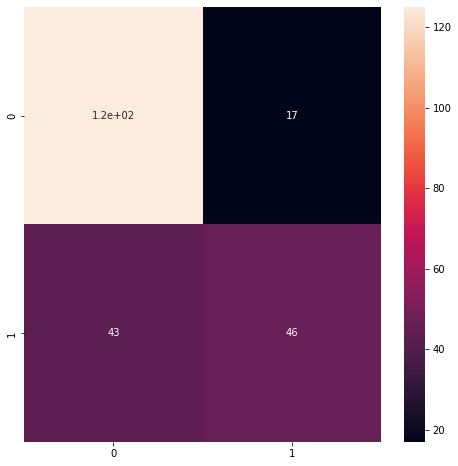

In [26]:
pred_test= np.argmax(model.predict(X_test_scal),axis=1)
print(classification_report(np.argmax(y_test,axis=1),pred_test))
print(f'ROC AUC del modelo: {roc_auc_score(np.argmax(y_test,axis=1),pred_test)}')
plt.figure(figsize=(8,8))
sns.heatmap(confusion_matrix(np.argmax(y_test,axis=1),pred_test), annot=True);


In [30]:
pred_prob_1

array([4.36090678e-01, 4.23555583e-01, 7.68816233e-01, 2.51666214e-02,
       7.29692820e-03, 6.60977438e-02, 9.95483637e-01, 7.83113241e-01,
       9.15883109e-02, 1.63114458e-01, 4.87226427e-01, 1.43787414e-01,
       6.59373775e-03, 8.91046524e-02, 3.33282202e-02, 2.06590205e-01,
       4.94776785e-01, 1.12423792e-01, 5.35909891e-01, 9.26650071e-04,
       9.20284629e-01, 9.92731899e-02, 2.79186398e-01, 9.70405459e-01,
       5.47603607e-01, 2.35092327e-01, 8.36815298e-01, 2.54579961e-01,
       4.06846166e-01, 4.67156380e-01, 2.51603127e-02, 3.56029570e-01,
       4.95092608e-02, 4.67270821e-01, 7.33703017e-01, 7.91581988e-01,
       4.93678361e-01, 2.20175624e-01, 8.13791990e-01, 8.08317542e-01,
       5.17519414e-01, 7.63561845e-01, 1.38195619e-01, 2.42731273e-02,
       2.03965809e-02, 1.63679663e-02, 4.95631725e-01, 4.29239608e-02,
       3.62627774e-01, 1.36154920e-01, 1.92034721e-01, 1.30359353e-02,
       3.37672979e-02, 9.27406847e-01, 9.98322904e-01, 8.42260104e-03,
      

8/8 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.74      0.88      0.81       142
           1       0.73      0.52      0.61        89

    accuracy                           0.74       231
   macro avg       0.74      0.70      0.71       231
weighted avg       0.74      0.74      0.73       231

ROC AUC del modelo: 0.8089887640449438


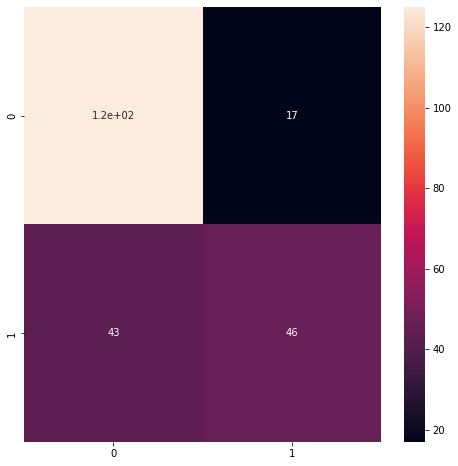

In [31]:
pred_prob_1 = model.predict(X_test_scal)[:,1] # evaluamos sobre la probabilidad de 1
print(classification_report(np.argmax(y_test,axis=1),pred_test))
print(f'ROC AUC del modelo: {roc_auc_score(np.argmax(y_test,axis=1),pred_prob_1)}')  # solo podemos usarlo en el ROC AUC
plt.figure(figsize=(8,8))
sns.heatmap(confusion_matrix(np.argmax(y_test,axis=1),pred_test), annot=True);

**Regresión**

In [59]:
# Cargamos datos
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

housing = fetch_california_housing()
df = pd.DataFrame(housing.data, columns = housing.feature_names)
df['target'] = housing['target']
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


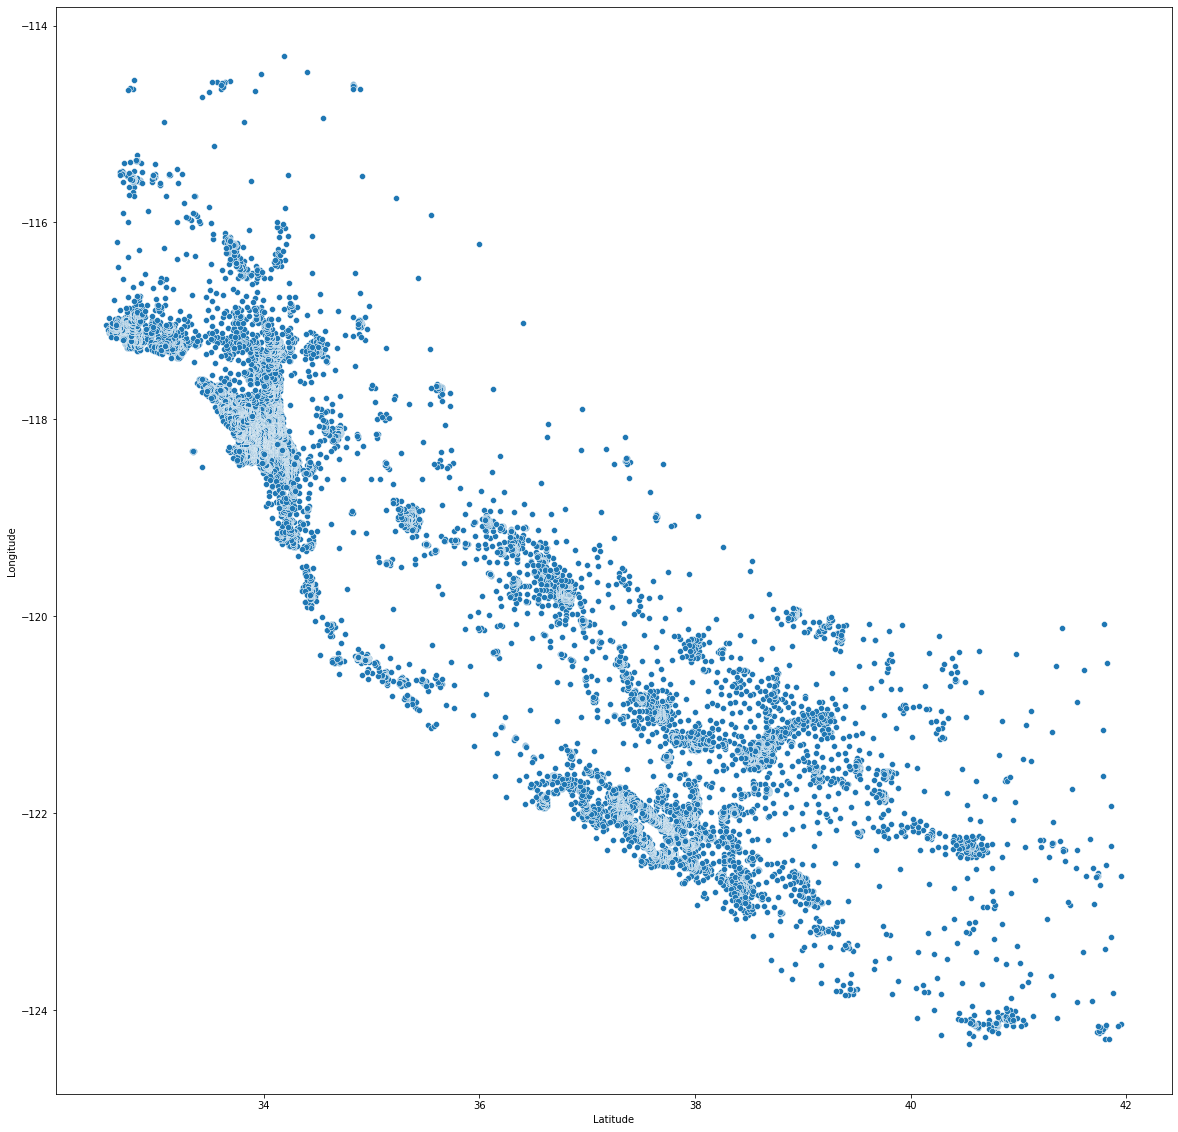

In [93]:
import seaborn as sns
plt.figure(figsize=(20,20))
sns.scatterplot(data = df, x = 'Latitude', y = 'Longitude');

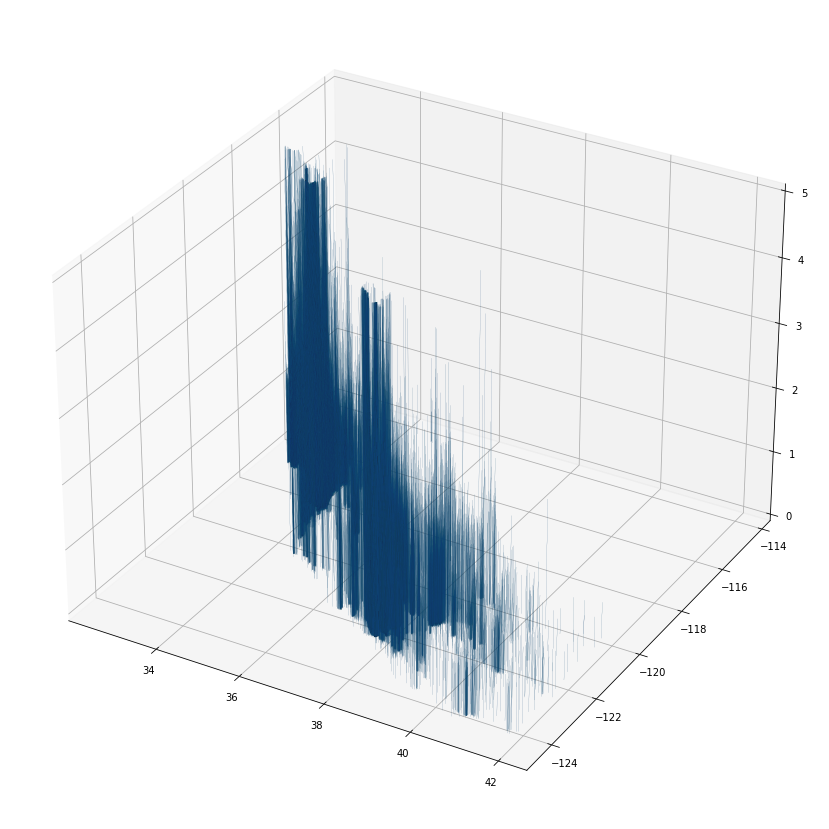

In [104]:
fig = plt.figure(figsize=(20,15))
ax = fig.add_subplot(projection='3d')

ax.bar3d(x=df.Latitude, y=df.Longitude, z=np.zeros_like(df.target), dx=0.001, dy=0.001, dz=df.target);

In [60]:
df.shape

(20640, 9)

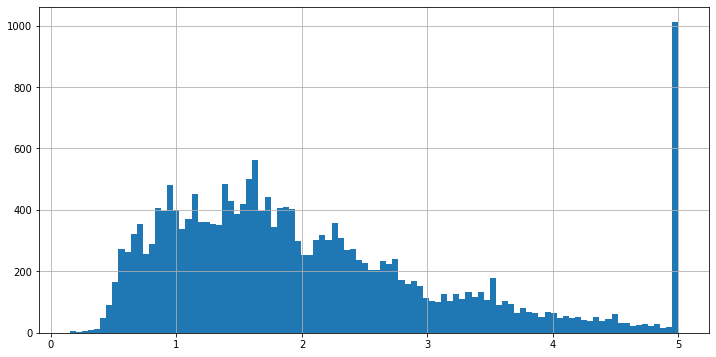

In [61]:
plt.figure(figsize=(12,6))
df.target.hist(bins=100);

En este ejemplo, preparamos nuestro conjunto de validación

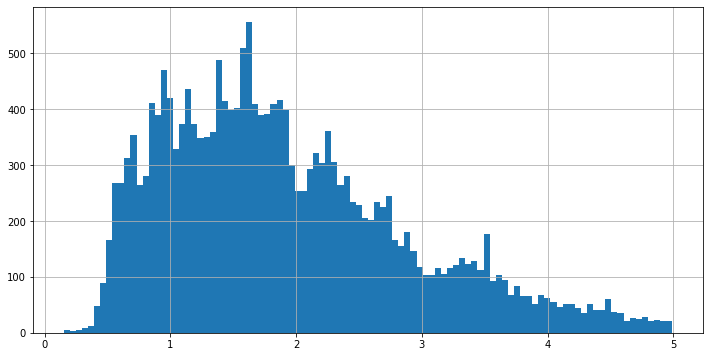

In [49]:
plt.figure(figsize=(12,6))
df[df.target< 4.999].target.hist(bins=100);

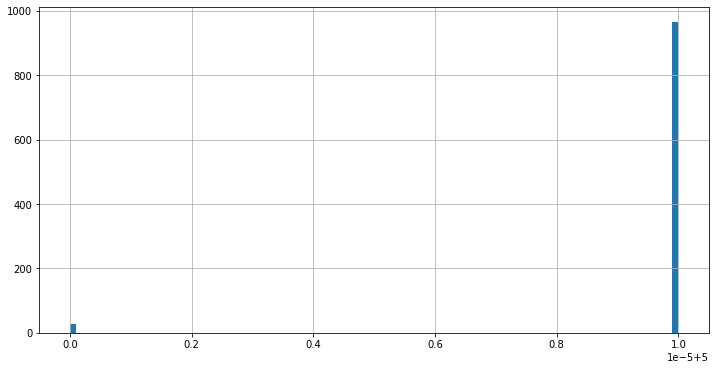

In [48]:
plt.figure(figsize=(12,6))
df[df.target > 4.999].target.hist(bins=100);

In [47]:
df[df.target > 4.999].target

89       5.00001
459      5.00001
493      5.00001
494      5.00001
509      5.00001
          ...   
20422    5.00001
20426    5.00001
20427    5.00001
20436    5.00001
20443    5.00001
Name: target, Length: 992, dtype: float64

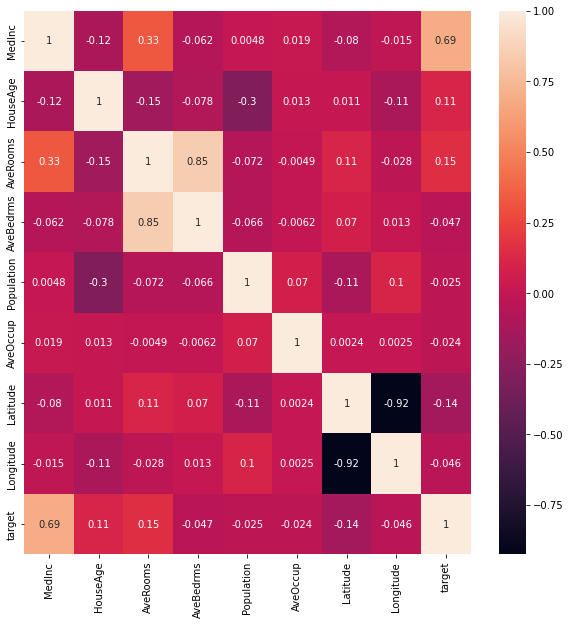

In [94]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True);

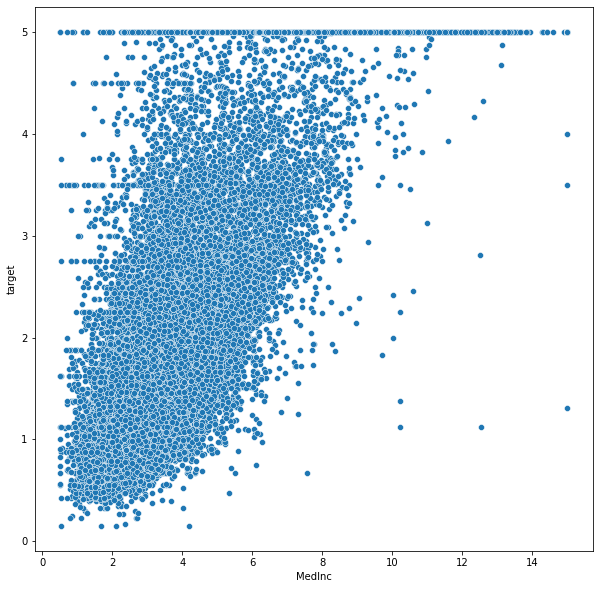

In [95]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=df, x= 'MedInc', y ='target');

In [54]:
housing.target

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

In [62]:
X = df[df.target < 4.999].drop('target', axis=1)
y = np.array(df[df.target < 4.999].target)

In [63]:
X_train_full, X_test, y_train_full, y_test = train_test_split(X,y, random_state=42)

X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

scaler = MinMaxScaler()
scaler2 = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

#Escalamos también la y porque las redes neuronales trabajan mejor con rangos entre 0 y 1

y_train = scaler2.fit_transform(y_train.reshape(-1,1))
y_valid = scaler2.transform(y_valid.reshape(-1,1))

In [64]:
X_train.shape

(11052, 8)

In [65]:
y_train.shape

(11052, 1)

Montamos el modelo. Simplemente se compondrá de una hidden layer, a la que le configuramos una capa previa de entrada de tamaño 8  (las features).

Se trata de un modelo de regresión, por lo que la capa de salida es una única neurona.

In [85]:
model = keras.models.Sequential([
    keras.layers.Dense(input_shape=X_train.shape[1:],
                       units=15,
                       activation='tanh'
                      ),
    keras.layers.Dense(units=1)
])

In [78]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 15)                135       
                                                                 
 dense_10 (Dense)            (None, 1)                 16        
                                                                 
Total params: 151
Trainable params: 151
Non-trainable params: 0
_________________________________________________________________


In [79]:
model.compile(loss="mean_squared_error",
             optimizer="adam")

history = model.fit(X_train,
                   y_train,
                   epochs=30,
                   validation_data=(X_valid, y_valid))

Epoch 1/30
346/346 [==============================] - 1s 1ms/step - loss: 0.0253 - val_loss: 0.0196
Epoch 2/30
346/346 [==============================] - 0s 934us/step - loss: 0.0193 - val_loss: 0.0191
Epoch 3/30
346/346 [==============================] - 0s 913us/step - loss: 0.0186 - val_loss: 0.0184
Epoch 4/30
346/346 [==============================] - 0s 917us/step - loss: 0.0181 - val_loss: 0.0178
Epoch 5/30
346/346 [==============================] - 0s 913us/step - loss: 0.0178 - val_loss: 0.0178
Epoch 6/30
346/346 [==============================] - 0s 924us/step - loss: 0.0176 - val_loss: 0.0174
Epoch 7/30
346/346 [==============================] - 0s 939us/step - loss: 0.0175 - val_loss: 0.0179
Epoch 8/30
346/346 [==============================] - 0s 914us/step - loss: 0.0175 - val_loss: 0.0175
Epoch 9/30
346/346 [==============================] - 0s 979us/step - loss: 0.0174 - val_loss: 0.0172
Epoch 10/30
346/346 [==============================] - 0s 887us/step - loss: 0.0174 

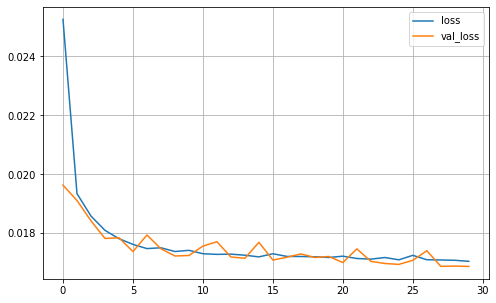

In [80]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid()
plt.show()

In [82]:
mse_test = model.evaluate(X_test,y_test)
print(mse_test)

154/154 [==============================] - 0s 747us/step - loss: 3.1655
3.1654512882232666


In [71]:
model.predict(X_test)

154/154 [==============================] - 0s 571us/step


array([[0.5490411 ],
       [0.5397866 ],
       [0.58078504],
       ...,
       [0.35719612],
       [0.121503  ],
       [0.4264732 ]], dtype=float32)

In [72]:
pred_test = model.predict(X_test)

# Desnormalizamos las predicciones
pred_test2 = scaler2.inverse_transform(pred_test)
pred_test2

154/154 [==============================] - 0s 576us/step


array([[2.8079035 ],
       [2.7631023 ],
       [2.9615762 ],
       ...,
       [1.8791801 ],
       [0.73818725],
       [2.214551  ]], dtype=float32)

In [73]:
# Medimos desempeño
from sklearn.metrics import mean_squared_error, r2_score
mse_2 = mean_squared_error(pred_test2, y_test)
r2_2 = r2_score(pred_test2, y_test)
print("Test error = ", mse_2)
print("Test R2 = ", r2_2)

Test error =  0.4214550899855905
Test R2 =  0.20413161917553257


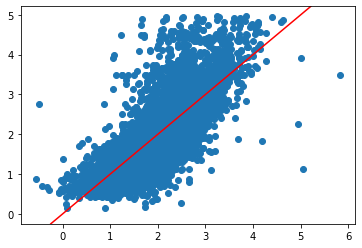

In [74]:
fig, ax = plt.subplots()
plt.plot(pred_test2, y_test, 'o')
plt.axline([0,0],[1,1],color='red');

### Guardar modelo
Para guardar el modelo, en el formato de Keras (HDF5). 

In [ ]:
model.save('my_keras_model.h5')

In [ ]:
# Lo volvemos a cargar
model2 = keras.models.load_model('my_keras_model.h5')

In [ ]:
model2.predict(X_test)

### Callbacks
Son funciones predefinidas de Keras a aplicar durante el entrenamiento
Por ejemplo, `ModelCheckpoint` sirve para que el modelo se vaya guardando tras cada epoch. Así no perdemos el progreso en caso de que decidamos interrumpir el entrenamiento. El callback recibe como argumento el nombre del objeto donde queremos que se guarde el modelo entrenado.

In [83]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("callback_model.h5")

history = model.fit(X_train,y_train,epochs=200,callbacks=[checkpoint_cb])

Epoch 1/200
346/346 [==============================] - 0s 846us/step - loss: 0.0170
Epoch 2/200
346/346 [==============================] - 0s 765us/step - loss: 0.0171
Epoch 3/200
346/346 [==============================] - 0s 753us/step - loss: 0.0171
Epoch 4/200
346/346 [==============================] - 0s 865us/step - loss: 0.0170
Epoch 5/200
346/346 [==============================] - 0s 810us/step - loss: 0.0170
Epoch 6/200
346/346 [==============================] - 0s 846us/step - loss: 0.0171
Epoch 7/200
346/346 [==============================] - 0s 874us/step - loss: 0.0169
Epoch 8/200
346/346 [==============================] - 0s 938us/step - loss: 0.0170
Epoch 9/200
346/346 [==============================] - 0s 819us/step - loss: 0.0169
Epoch 10/200
346/346 [==============================] - 0s 869us/step - loss: 0.0170
Epoch 11/200
346/346 [==============================] - 0s 822us/step - loss: 0.0169
Epoch 12/200
346/346 [==============================] - 0s 842us/step - lo

### Early Stopping
Interrumpe el entrenamiento cuando no ve progreso en el set de validación. Para ello tiene en cuenta un numero de epochs llamado `patience`. Se puede combinar con el callback

In [89]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3)

model = keras.models.Sequential([
    keras.layers.Dense(input_shape=X_train.shape[1:],
                       units=15,
                       activation='tanh'
                      ),
    keras.layers.Dense(units=1)
])

model.compile(loss="mean_squared_error",
             optimizer="adam")

history=model.fit(X_train,y_train,epochs=100,
                 callbacks=[checkpoint_cb, early_stopping_cb],
                 validation_data=(X_valid,y_valid))

Epoch 1/100
346/346 [==============================] - 1s 1ms/step - loss: 0.0262 - val_loss: 0.0206
Epoch 2/100
346/346 [==============================] - 0s 1ms/step - loss: 0.0198 - val_loss: 0.0189
Epoch 3/100
346/346 [==============================] - 0s 1ms/step - loss: 0.0189 - val_loss: 0.0186
Epoch 4/100
346/346 [==============================] - 0s 1ms/step - loss: 0.0183 - val_loss: 0.0179
Epoch 5/100
346/346 [==============================] - 0s 1ms/step - loss: 0.0179 - val_loss: 0.0176
Epoch 6/100
346/346 [==============================] - 0s 1ms/step - loss: 0.0177 - val_loss: 0.0175
Epoch 7/100
346/346 [==============================] - 0s 1ms/step - loss: 0.0175 - val_loss: 0.0179
Epoch 8/100
346/346 [==============================] - 0s 1ms/step - loss: 0.0175 - val_loss: 0.0175
Epoch 9/100
346/346 [==============================] - 0s 1ms/step - loss: 0.0174 - val_loss: 0.0175
Epoch 10/100
346/346 [==============================] - 0s 1ms/step - loss: 0.0174 - val_lo

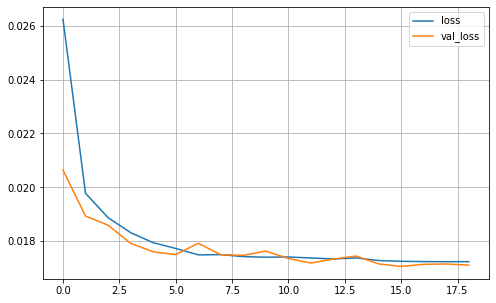

In [90]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid()
plt.show()